In [1]:
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [30]:
df = pd.read_csv('df_with_clean_transcript')

In [4]:
tags = ['3d printing', 'activism',\
       'Addiction', 'adventure', 'advertising', 'Africa', 'aging',\
       'agriculture', 'AI', 'AIDS', 'aircraft', 'algorithm',\
       'alternative energy', 'Alzheimers', 'ancient world', 'animals',\
       'animation', 'Anthropocene', 'anthropology', 'ants', 'apes',\
       'archaeology', 'architecture', 'art', 'Asia', 'asteroid',\
       'astrobiology', 'astronomy', 'atheism', 'augmented reality',\
       'Autism spectrum disorder', 'bacteria', 'beauty', 'bees',\
       'behavioral economics', 'big bang', 'big problems', 'biodiversity',\
       'Bioethics', 'biology', 'biomechanics', 'biomimicry', 'biosphere',\
       'biotech', 'birds', 'Blindness', 'blockchain', 'body language', 'books',\
       'botany', 'brain', 'Brand', 'Brazil', 'Buddhism', 'bullying',\
       'business', 'cancer', 'capitalism', 'cars', 'cello',\
       'charter for compassion', 'chemistry', 'children', 'china', 'choice',\
       'Christianity', 'cities', 'climate change', 'cloud', 'code',\
       'cognitive science', 'collaboration', 'comedy', 'communication',\
       'community', 'compassion', 'complexity', 'composing', 'computers',\
       'conducting', 'consciousness', 'conservation', 'consumerism',\
       'corruption', 'cosmos', 'creativity', 'crime', 'Criminal Justice',\
       'CRISPR', 'crowdsourcing', 'culture', 'curiosity', 'cyborg', 'dance',\
       'dark matter', 'data', 'death', 'Debate', 'decision-making',\
       'deextinction', 'demo', 'democracy', 'depression', 'design',\
       'dinosaurs', 'disability', 'disaster relief', 'discovery', 'disease',\
       'DNA', 'driverless cars', 'drones', 'ebola', 'ecology', 'economics',\
       'education', 'Egypt', 'empathy', 'energy', 'engineering',\
       'entertainment', 'entrepreneur', 'environment', 'epidemiology',\
       'Europe', 'evil', 'evolution', 'evolutionary psychology', 'exoskeleton',\
       'exploration', 'extraterrestrial life', 'extreme sports', 'failure',\
       'faith', 'family', 'farming', 'fashion', 'fear', 'feminism', 'film',\
       'finance', 'fish', 'flight', 'food', 'Foreign Policy', 'forensics',\
       'friendship', 'funny', 'future', 'gaming', 'garden', 'gender',\
       'Gender equality', 'Gender spectrum', 'genetics', 'geology', 'glacier',\
       'global development', 'global issues', 'goal-setting', 'God', 'Google',\
       'government', 'grammar', 'green', 'guitar', 'Guns', 'hack', 'happiness',\
       'health', 'health care', 'hearing', 'heart health', 'history', 'HIV',\
       'Human body', 'human origins', 'humanity', 'humor', 'identity',\
       'illness', 'illusion', 'immigration', 'india', 'industrial design',\
       'inequality', 'infrastructure', 'innovation', 'insects', 'intelligence',\
       'interface design', 'Internet', 'interview', 'introvert', 'invention',\
       'investment', 'Iran', 'iraq', 'Islam', 'jazz', 'journalism', 'language',\
       'law', 'leadership', 'LGBT', 'library', 'life', 'literature',\
       'live music', 'love', 'MacArthur grant', 'machine learning', 'magic',\
       'manufacturing', 'map', 'marketing', 'Mars', 'materials', 'math',\
       'media', 'medical imaging', 'medical research', 'medicine',\
       'meditation', 'meme', 'memory', 'men', 'mental health', 'microbes',\
       'microbiology', 'microfinance', 'microsoft', 'Middle East', 'military',\
       'mind', 'mindfulness', 'mining', 'mission blue', 'mobility',\
       'molecular biology', 'money', 'monkeys', 'Moon', 'morality',\
       'motivation', 'movies', 'museums', 'music', 'nanoscale', 'narcotics',\
       'NASA', 'natural disaster', 'Natural resources', 'nature',\
       'neuroscience', 'New York', 'news', 'Nobel prize', 'nonviolence',\
       'novel', 'nuclear energy', 'nuclear weapons', 'obesity', 'oceans',\
       'oil', 'online video', 'open-source', 'origami', 'pain', 'painting',\
       'paleontology', 'pandemic', 'parenting', 'peace', 'performance',\
       'performance art', 'personal growth', 'personality', 'pharmaceuticals',\
       'philanthropy', 'philosophy', 'photography', 'physics', 'physiology',\
       'piano', 'Planets', 'plants', 'plastic', 'play', 'poetry', 'policy',\
       'politics', 'pollution', 'population', 'potential', 'poverty',\
       'prediction', 'pregnancy', 'presentation', 'primates', 'prison',\
       'privacy', 'product design', 'productivity', 'programming',\
       'prosthetics', 'protests', 'psychology', 'PTSD', 'public health',\
       'public spaces', 'race', 'refugees', 'relationships', 'religion',\
       'resources', 'rivers', 'robots', 'rocket science', 'sanitation',\
       'science', 'science and art', 'security', 'self', 'Senses', 'sex',\
       'sexual violence', 'shopping', 'sight', 'simplicity', 'singer',\
       'skateboarding', 'Slavery', 'sleep', 'smell', 'social change',\
       'social media', 'society', 'sociology', 'software', 'solar energy',\
       'solar system', 'sound', 'South America', 'space', 'speech',\
       'spoken word', 'sports', 'state-building', 'statistics', 'storytelling',\
       'street art', 'String theory', 'student', 'submarine', 'success',\
       'suicide', 'Surgery', 'Surveillance', 'sustainability',\
       'synthetic biology', 'Syria', 'teaching', 'technology', 'TED Books',\
       'TED Brain Trust', 'TED en Español', 'TED Fellows', 'TED Prize',\
       'TED Residency', 'TED-Ed', 'TEDMED', 'TEDNYC', 'TEDx', 'TEDYouth',\
       'telecom', 'telescopes', 'television', 'terrorism', 'testing',\
       'theater', 'time', 'toy', 'trafficking', 'Transgender',\
       'transportation', 'travel', 'trees', 'trust', 'typography',\
       'United States', 'universe', 'urban', 'urban planning', 'Vaccines',\
       'violence', 'violin', 'virtual reality', 'virus', 'visualizations',\
       'vocals', 'vulnerability', 'war', 'water', 'weather', 'web',\
       'wikipedia', 'wind energy', 'women', 'women in business', 'work',\
       'work-life balance', 'world cultures', 'writing', 'wunderkind', 'youth']

In [5]:
df_tags=df[tags]
tags_info = pd.DataFrame(df_tags.sum())

In [6]:
for i in tags:
    tags_info.loc[i,'num_comment']=df[df[i]==1]['comments'].sum()
    tags_info.loc[i,'avg_duration']=round(df[df[i]==1]['duration'].mean()/60)
    tags_info.loc[i,'num_views']=df[df[i]==1]['views'].sum()
    tags_info.loc[i,'avg_views']=round(df[df[i]==1]['views'].mean())

In [7]:
tags_info.head()

0  num_comment  avg_duration    num_views  avg_views
3d printing    3        251.0          20.0    3530313.0  1176771.0
activism     155      26014.0          14.0  182116671.0  1174946.0
Addiction      5        498.0          17.0   20169651.0  4033930.0
adventure     48       9139.0          14.0   69314264.0  1444047.0
advertising    9       1588.0          17.0   14210103.0  1578900.0

In [8]:
tags_info.sort_values(by='num_views',ascending=False)

0  num_comment  avg_duration     num_views  \
culture                 476      90373.0          13.0  1.123946e+09   
technology              712     147028.0          15.0  1.038813e+09   
science                 548     112200.0          15.0  8.854673e+08   
business                338      73999.0          14.0  7.250917e+08   
TEDx                    418      96808.0          14.0  6.989490e+08   
global issues           490     102526.0          14.0  6.309792e+08   
entertainment           287      58839.0          14.0  5.729027e+08   
design                  408      86282.0          14.0  5.506817e+08   
psychology              117      21464.0          14.0  4.746718e+08   
brain                   153      36808.0          15.0  4.504712e+08   
health                  234      45173.0          15.0  3.933121e+08   
creativity              182      31217.0          14.0  3.690255e+08   
education               147      32408.0          14.0  3.466485e+08   
communication           190      43074.0          15.0  3.434654e+08   
society                 223      54911.0          15.0  3.410796e+08   
social change           216      47294.0          15.0  3.375186e+08   
innovation              224      49230.0          16.0  3.156703e+08   
humanity                177      39600.0          16.0  2.781808e+08   
biology                 182      39965.0          15.0  2.740658e+08   
children                140      30833.0          14.0  2.694032e+08   
art                     218      43404.0          13.0  2.613209e+08   
future                  194      37903.0          16.0  2.565244e+08   
humor                   101      19492.0          13.0  2.516451e+08   
economics               160      35257.0          14.0  2.379463e+08   
work                     71      23661.0          13.0  2.351306e+08   
happiness                72      15311.0          13.0  2.282380e+08   
collaboration           169      42050.0          15.0  2.266544e+08   
medicine                160      29238.0          16.0  2.180417e+08   
invention               139      36380.0          16.0  2.019381e+08   
storytelling            115      24992.0          12.0  1.992280e+08   
...                     ...          ...           ...           ...   
HIV                       6        798.0          16.0  5.392396e+06   
TED Residency             6       1855.0          14.0  5.288419e+06   
vulnerability             4        491.0          10.0  5.274115e+06   
urban                     4       1080.0          21.0  4.926089e+06   
nonviolence               6       1448.0          12.0  4.582332e+06   
glacier                   4        290.0          17.0  4.307899e+06   
augmented reality         2         81.0          20.0  4.198392e+06   
nuclear weapons           4        568.0          18.0  4.046063e+06   
ants                      4        812.0          17.0  4.017947e+06   
hearing                   5       1112.0          21.0  3.937231e+06   
apes                      3        591.0          17.0  3.892353e+06   
Moon                      3        380.0          10.0  3.842349e+06   
state-building            5        804.0          12.0  3.824928e+06   
street art                3        419.0           8.0  3.626335e+06   
3d printing               3        251.0          20.0  3.530313e+06   
mining                    3       1073.0          15.0  3.434399e+06   
charter for compassion    8       1152.0          14.0  3.215579e+06   
microfinance              4        606.0          15.0  3.201068e+06   
oil                       5        884.0          12.0  3.167946e+06   
epidemiology              3        162.0          14.0  2.863310e+06   
forensics                 3        704.0          14.0  2.815622e+06   
Nobel prize               2        202.0           9.0  2.540189e+06   
origami                   2        267.0          11.0  2.537580e+06   
pandemic                  3        421.0          14.0  2.502376e+

In [9]:
top5 = tags_info.sort_values(by='num_views',ascending=False).head(5)
last = tags_info.sort_values(by='num_views',ascending=False).tail(5)

In [35]:
#docs = list(df[df['art']==1]['clean_transcripts'])
docs = list(df['clean_transcripts'])
#instantiate CountVectorizer()
cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# count matrix
count_vector=cv.transform(docs)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [36]:
feature_names = cv.get_feature_names()
important_words = []
for i in range(len(docs)):
    #get tfidf vector for first document
    first_document_vector=tf_idf_vector[i]
    #print the scores
    df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    #df.sort_values(by=["tfidf"],ascending=False).index
    #print(list(df.tfidf.nlargest(3).index))
    important_words.extend(list(df_t.tfidf.nlargest(3).index))
#print(important_words)


(-0.5, 399.5, 199.5, -0.5)

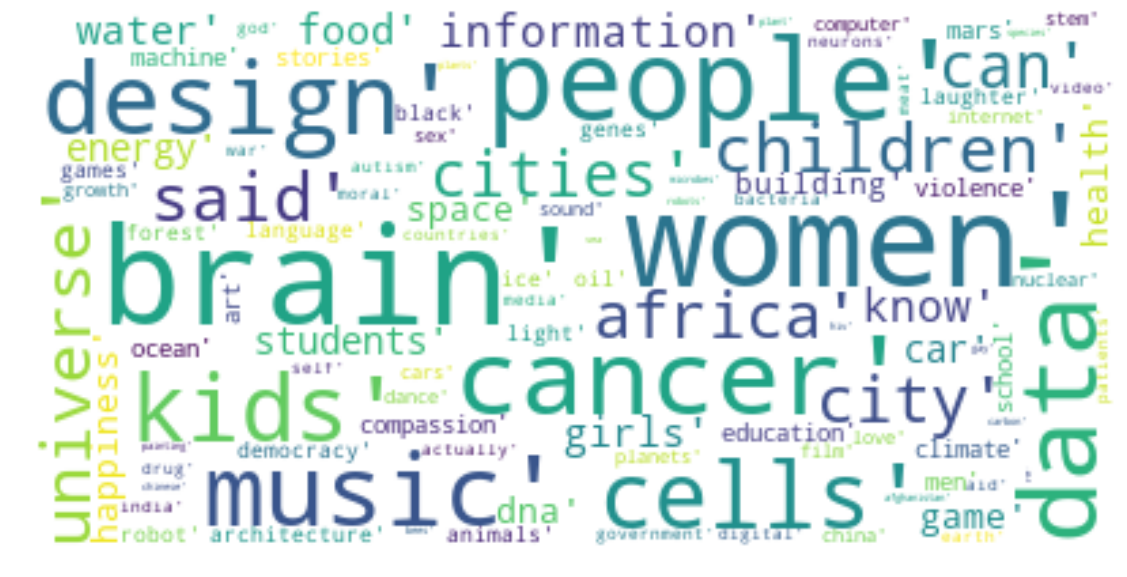

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(important_words))
figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#docs = list(df.clean_transcripts)
def tf_idf_words(tag,n):
    docs = list(df[df[tag]==1]['clean_transcripts'])
    #instantiate CountVectorizer()
    cv=CountVectorizer()
    # this steps generates word counts for the words in your docs
    word_count_vector=cv.fit_transform(docs)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    # count matrix
    count_vector=cv.transform(docs)
    # tf-idf scores
    tf_idf_vector=tfidf_transformer.transform(count_vector)
    feature_names = cv.get_feature_names()
    important_words = []
    for i in range(len(docs)):
        #get tfidf vector for first document
        first_document_vector=tf_idf_vector[i]
        #print the scores
        df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
        #df.sort_values(by=["tfidf"],ascending=False).index
        #print(list(df.tfidf.nlargest(3).index))
        important_words.extend(list(df_t.tfidf.nlargest(n).index))
    return important_words

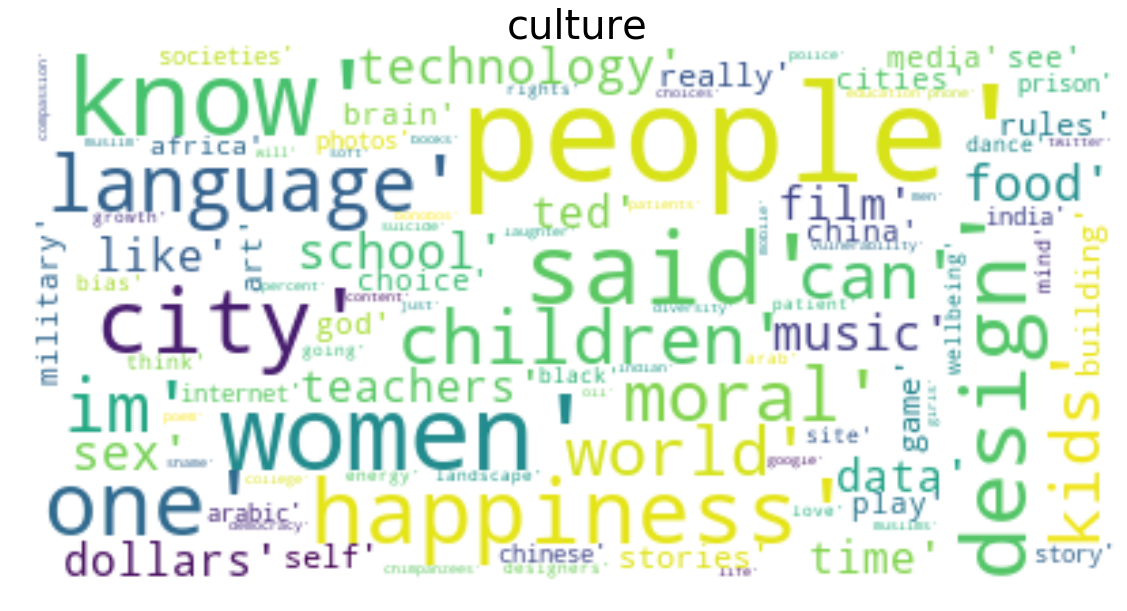

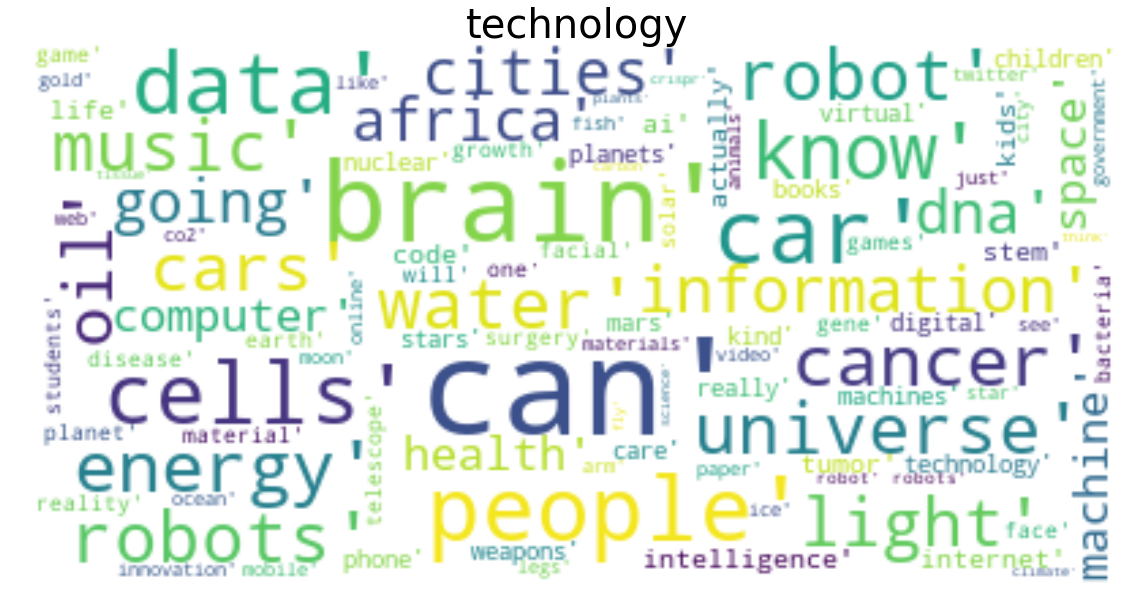

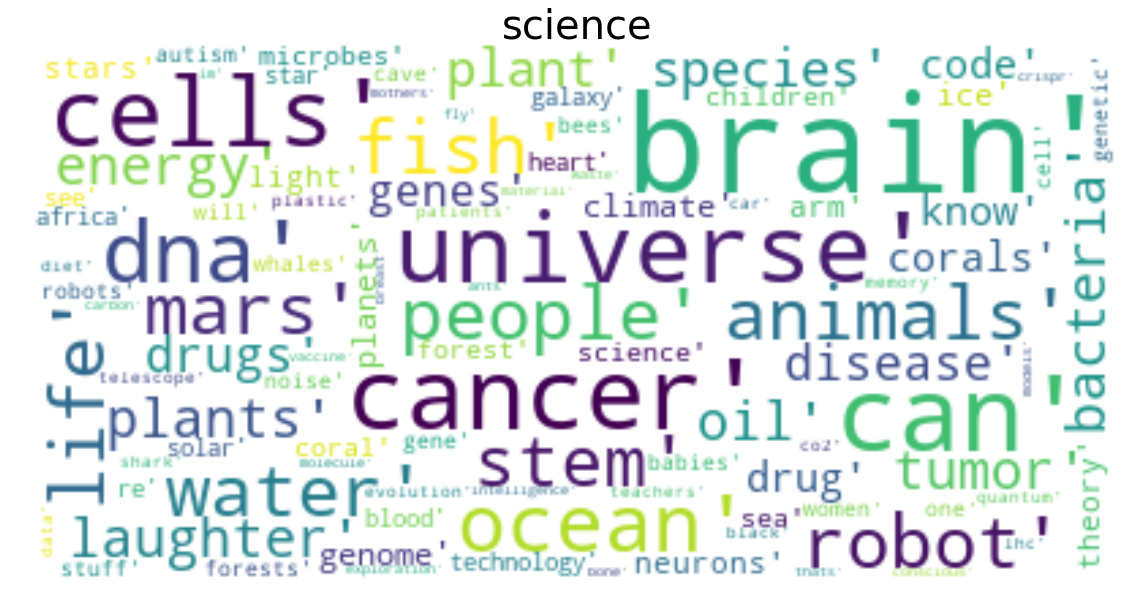

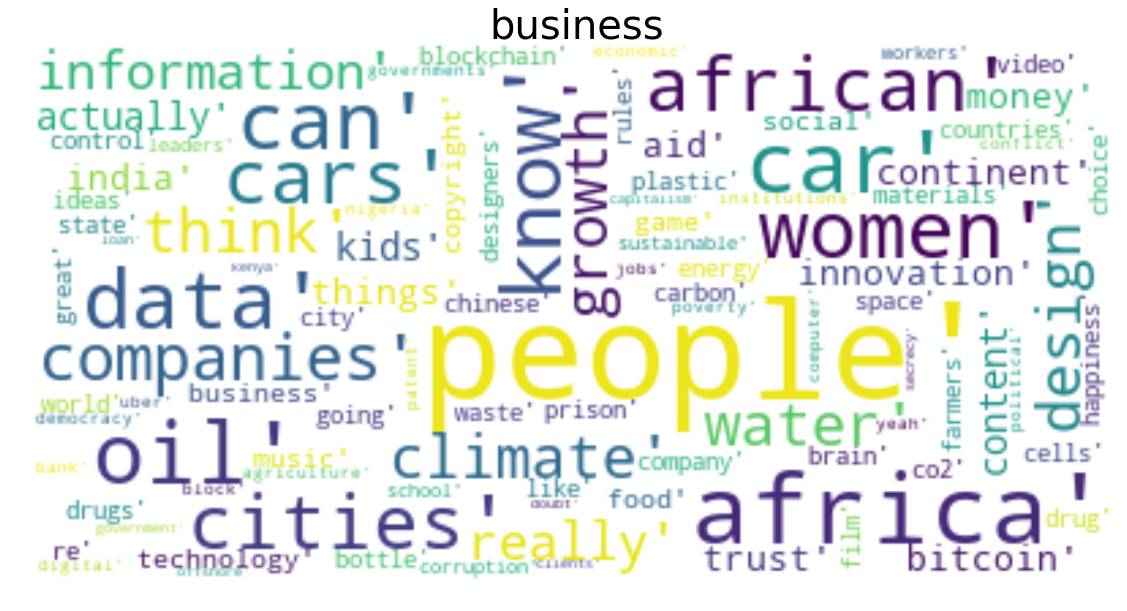

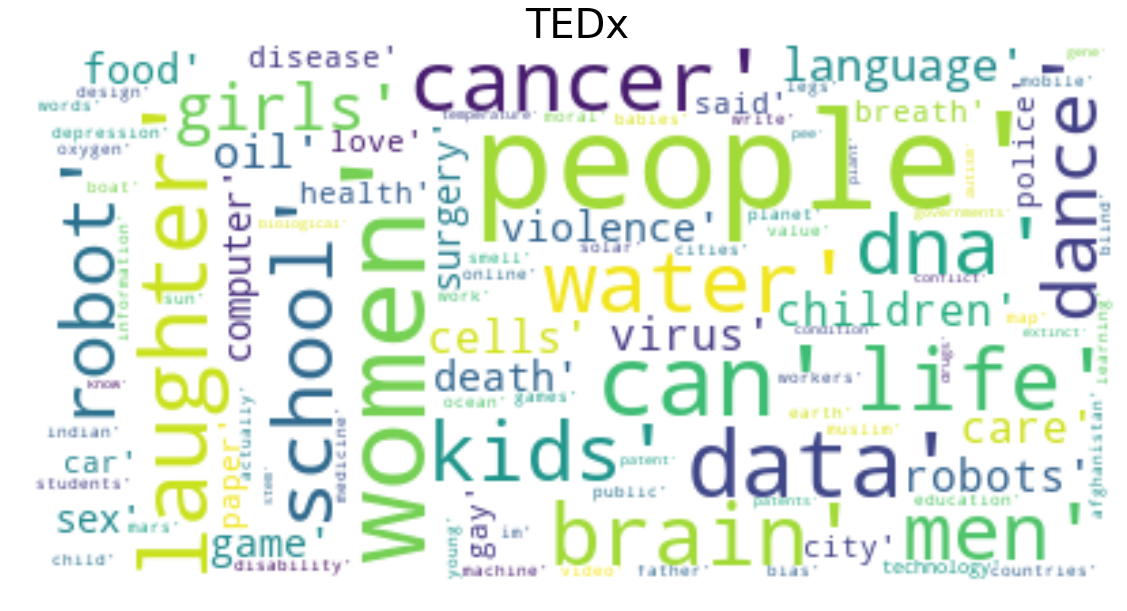

In [42]:
for i in top5.index:
    words = tf_idf_words(i,5)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(words))
    figure(figsize=(20,10))
    title(i,fontdict={'fontsize':40})
    pyplot.imshow(wordcloud, interpolation='bilinear')
    pyplot.axis("off")

### Trend

In [52]:
df2 = df[['event','clean_transcripts']]

In [57]:
df2['year']=[x[-4:] for x in df2.event]

/Users/xyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df2.shape

(2467, 3)

In [65]:
df2[df2.year.str.isdigit()].year.value_counts()

2009    193
2011    181
2010    179
2013    176
2012    169
2014    169
2015    118
2016    110
2007    109
2008     79
2017     69
2005     62
2006     48
2003     34
2004     30
2002     28
1998      6
2001      1
1994      1
1990      1
1984      1
Name: year, dtype: int64

In [62]:
df3 = df2[df2.year.str.isdigit()]

In [63]:
df3.shape

(1764, 3)

In [70]:
df4 = df3[df3.year.astype(int)>2009]

In [71]:
df4.shape

(1171, 3)

In [74]:
df5 = pd.get_dummies(df4,columns=['year'])

In [75]:
df5.columns

Index(['event', 'clean_transcripts', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017'],
      dtype='object')

In [76]:
years = ['year_2010', 'year_2011', 'year_2012','year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#docs = list(df.clean_transcripts)
def tf_idf_words(tag,n):
    docs = list(df5[df5[tag]==1]['clean_transcripts'])
    #instantiate CountVectorizer()
    cv=CountVectorizer()
    # this steps generates word counts for the words in your docs
    word_count_vector=cv.fit_transform(docs)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    # count matrix
    count_vector=cv.transform(docs)
    # tf-idf scores
    tf_idf_vector=tfidf_transformer.transform(count_vector)
    feature_names = cv.get_feature_names()
    important_words = []
    for i in range(len(docs)):
        #get tfidf vector for first document
        first_document_vector=tf_idf_vector[i]
        #print the scores
        df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
        #df.sort_values(by=["tfidf"],ascending=False).index
        #print(list(df.tfidf.nlargest(3).index))
        important_words.extend(list(df_t.tfidf.nlargest(n).index))
    return important_words

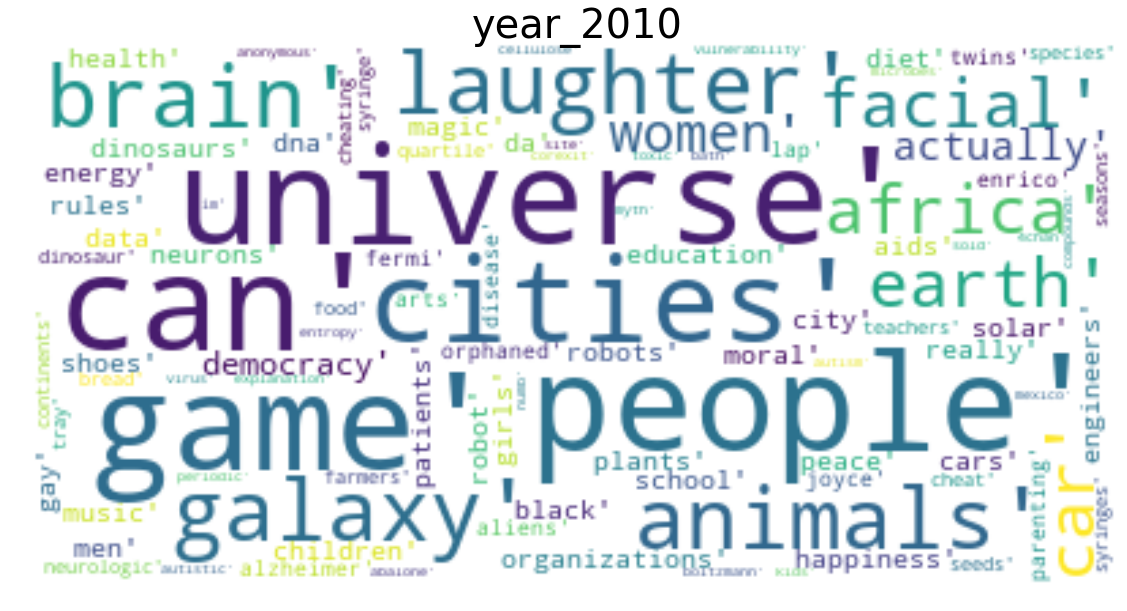

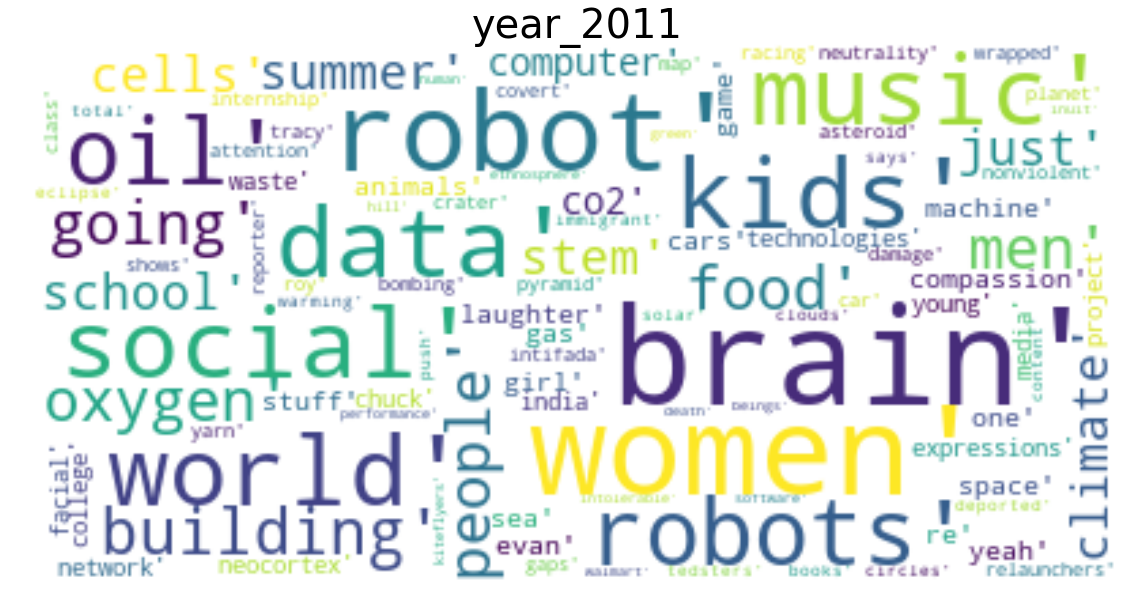

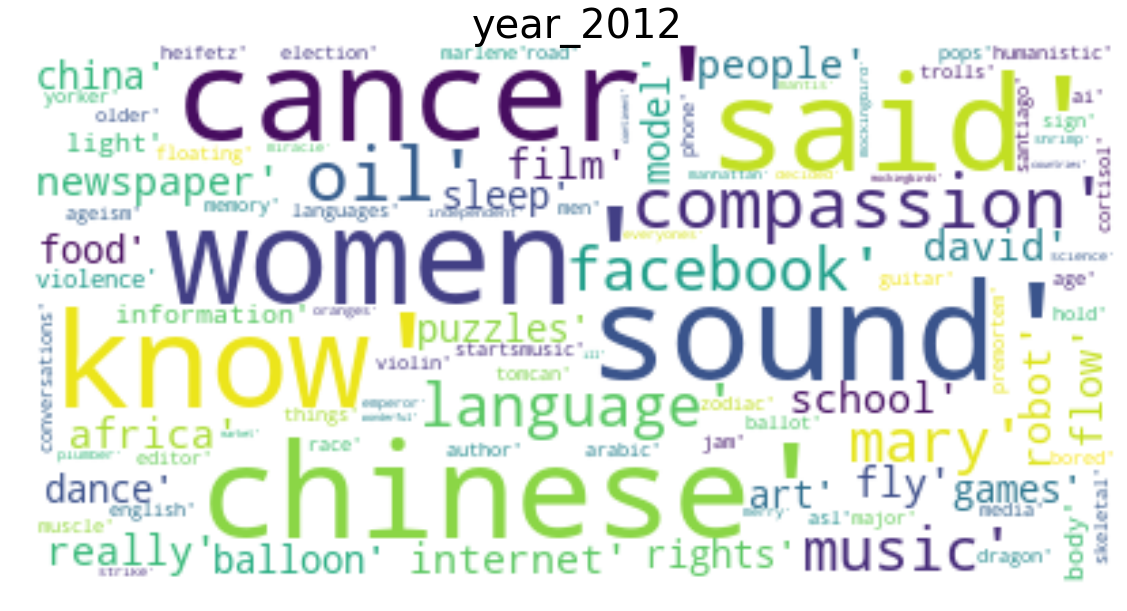

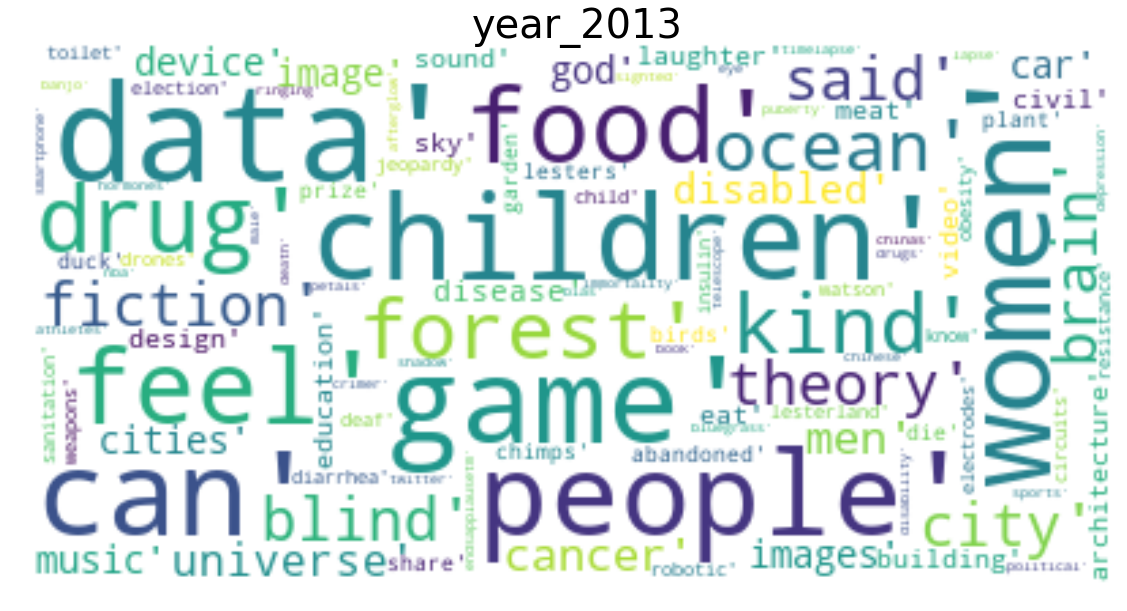

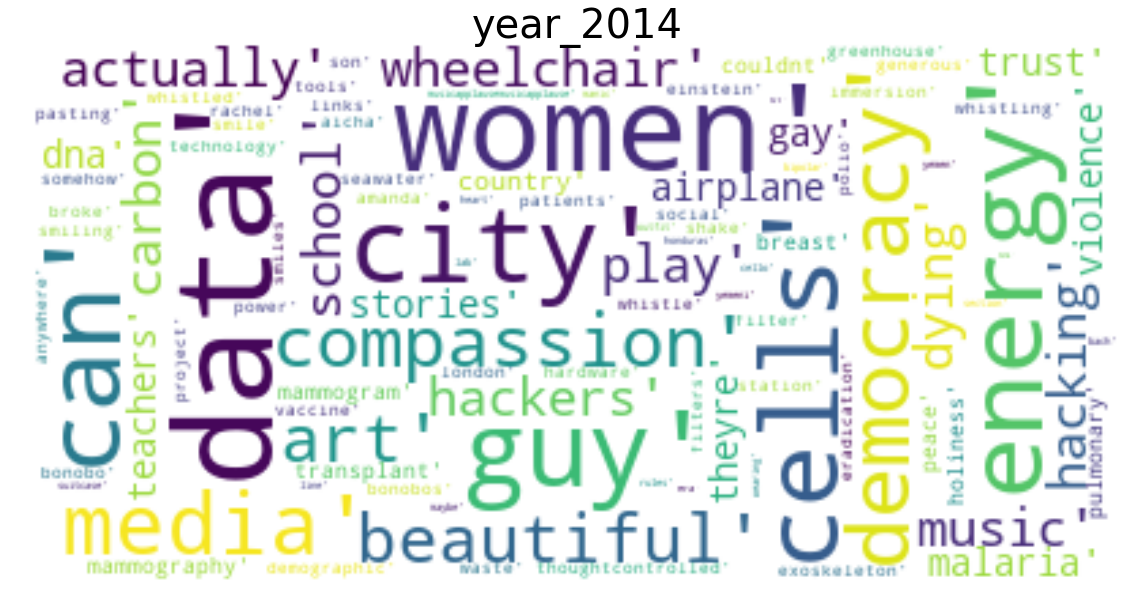

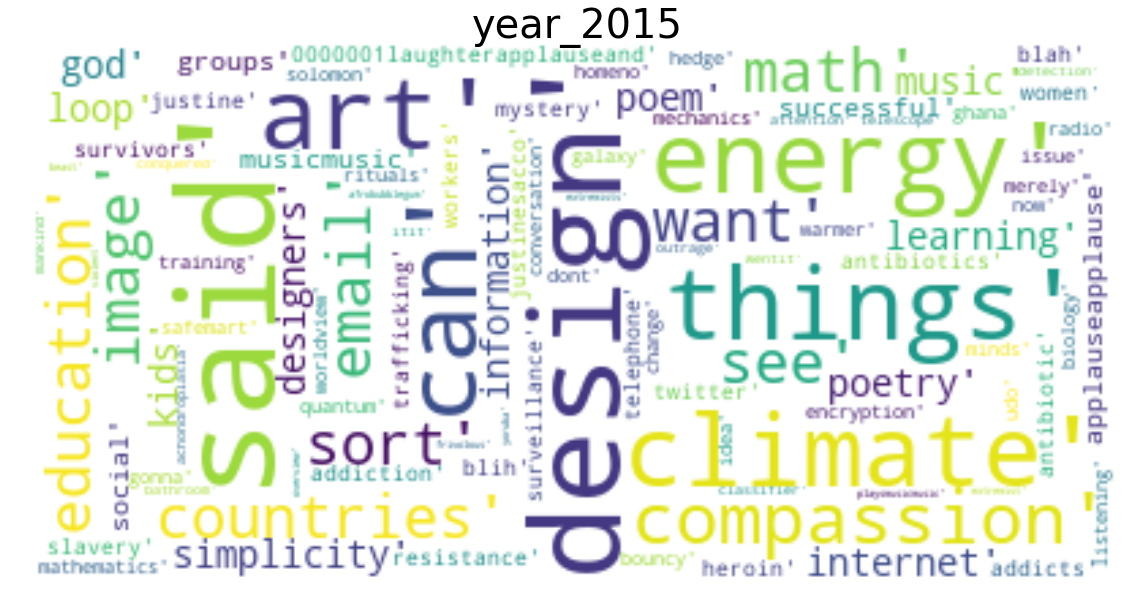

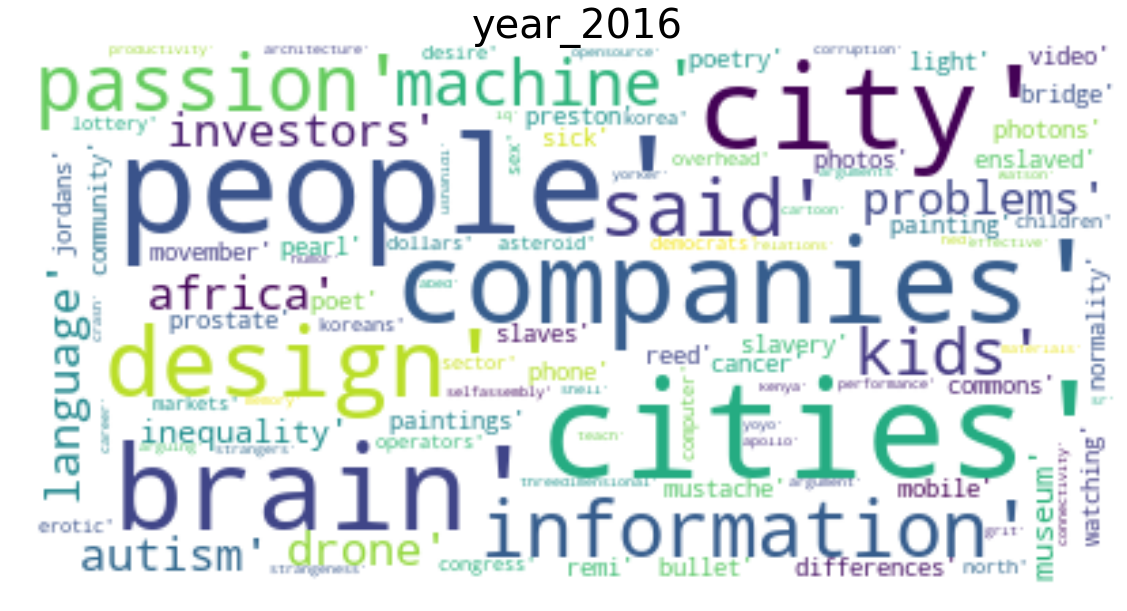

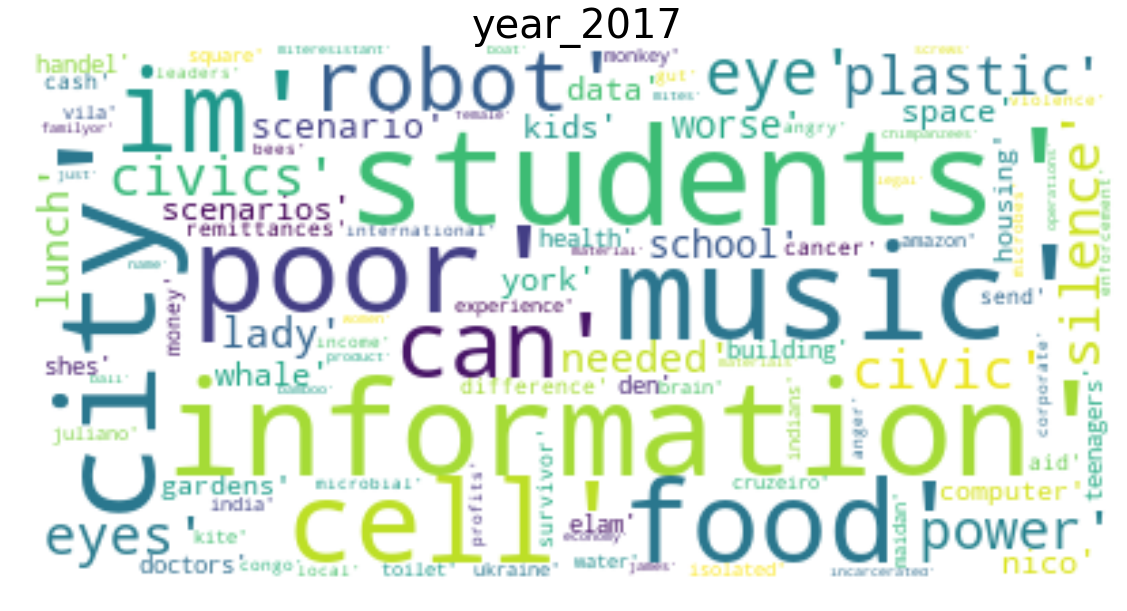

In [79]:
for i in years:
    words = tf_idf_words(i,3)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(words))
    figure(figsize=(20,10))
    title(i,fontdict={'fontsize':40})
    pyplot.imshow(wordcloud, interpolation='bilinear')
    pyplot.axis("off")

In [120]:
docs = list(df5[df5['year_2017']==1]['clean_transcripts'])
#instantiate CountVectorizer()
cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# count matrix
count_vector=cv.transform(docs)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names()

first_document_vector=tf_idf_vector[1]
df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
#df.sort_values(by=["tfidf"],ascending=False).index
#print(list(df.tfidf.nlargest(3).index))

In [105]:
for i in range(len(docs)):
    #get tfidf vector for first document
    first_document_vector=tf_idf_vector[i]
    #print the scores
    df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    #df.sort_values(by=["tfidf"],ascending=False).index
    #print(list(df.tfidf.nlargest(3).index))
    if i == 0:
        words_tfidf = pd.DataFrame(df_t.tfidf.nlargest(10)).reset_index()
        #print(words_tfidf)
    else:
        x=pd.DataFrame(df_t.tfidf.nlargest(10)).reset_index()
        words_tfidf=pd.concat([words_tfidf, x], axis=0)

In [112]:
s = words_tfidf.groupby(words_tfidf['index']).mean()

In [124]:
'well' in list(s.index)

True

In [123]:
s.loc['well','tfidf']

0.15635271960652186

In [118]:
key_words = list(s.sort_values(by='tfidf',ascending=False).tfidf.nlargest(20).index)

In [119]:
key_words

['bees',
 'microbes',
 'bamboo',
 'prime',
 'lunch',
 'cave',
 'legal',
 'romo',
 'cash',
 'anger',
 'bear',
 'stem',
 'congestion',
 'water',
 'letters',
 'power',
 'incarcerated',
 'phone',
 'remittances',
 'international']

In [125]:
def tf_idf_score(y,n):
    docs = list(df5[df5[y]==1]['clean_transcripts'])
    #instantiate CountVectorizer()
    cv=CountVectorizer()
    # this steps generates word counts for the words in your docs
    word_count_vector=cv.fit_transform(docs)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    # count matrix
    count_vector=cv.transform(docs)
    # tf-idf scores
    tf_idf_vector=tfidf_transformer.transform(count_vector)
    feature_names = cv.get_feature_names()

    first_document_vector=tf_idf_vector[1]
    df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    #df.sort_values(by=["tfidf"],ascending=False).index
    #print(list(df.tfidf.nlargest(3).index))
    for i in range(len(docs)):
        #get tfidf vector for first document
        first_document_vector=tf_idf_vector[i]
        #print the scores
        df_t = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
        #df.sort_values(by=["tfidf"],ascending=False).index
        #print(list(df.tfidf.nlargest(3).index))
        if i == 0:
            words_tfidf = pd.DataFrame(df_t.tfidf.nlargest(n)).reset_index()
            #print(words_tfidf)
        else:
            x=pd.DataFrame(df_t.tfidf.nlargest(n)).reset_index()
            words_tfidf=pd.concat([words_tfidf, x], axis=0)
        s = words_tfidf.groupby(words_tfidf['index']).mean()
    col=[]
    for k in key_words:
        if k in list(s.index):
            col.append(s.loc[k,'tfidf'])
        else:
            col.append(0)
    return col

In [132]:
dt_trend = pd.DataFrame(s.sort_values(by='tfidf',ascending=False).tfidf.nlargest(20))

In [133]:
dt_trend.column=['year2017']

/Users/xyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [134]:
dt_trend

tfidf
index                  
bees           0.847225
microbes       0.688957
bamboo         0.666873
prime          0.648453
lunch          0.617774
cave           0.616580
legal          0.600895
romo           0.556230
cash           0.537004
anger          0.527233
bear           0.507612
stem           0.494637
congestion     0.481095
water          0.458529
letters        0.433227
power          0.412865
incarcerated   0.404412
phone          0.403083
remittances    0.402798
international  0.401229

In [135]:
n = 10
for i in years:
    dt_trend[i]=tf_idf_score(i,n)

In [140]:
dt_trend = dt_trend.drop(columns='tfidf')

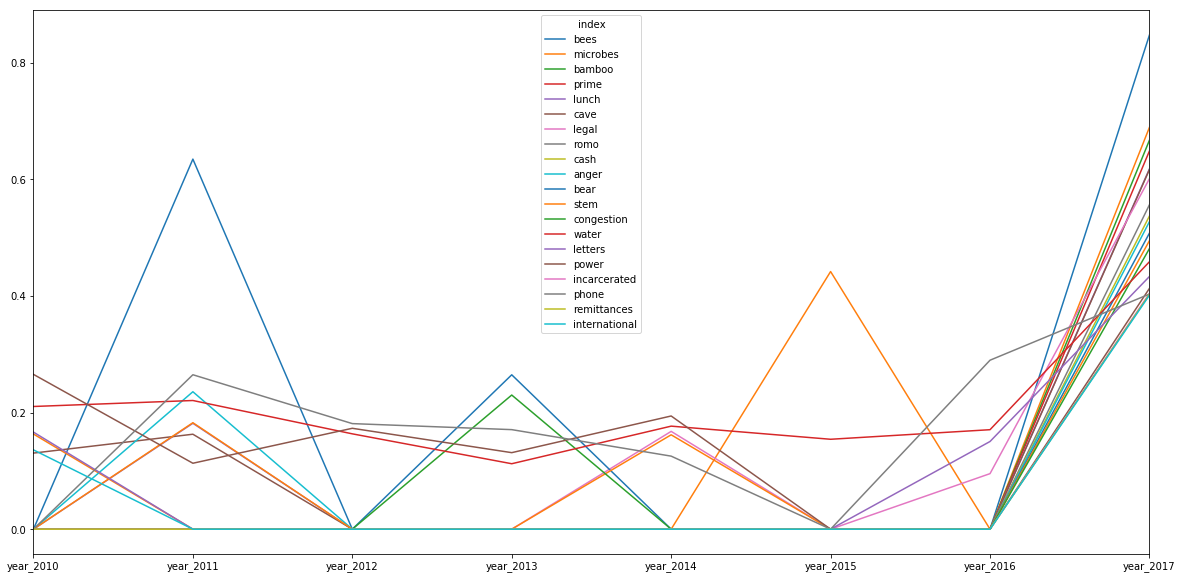

In [146]:
dt_trend.T.plot(figsize=(20,10))

In [156]:
def word_count(y):
    docs = list(df5[df5[y]==1]['clean_transcripts'])
    s = ' '.join(docs)
    counts = dict()
    words = s.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

In [157]:
x = word_count('year_2017')

In [163]:
x.keys

<function dict.keys>

In [164]:
'born' in x

True

In [159]:
x['born']

23

In [168]:
df_wc = dt_trend.copy()

In [169]:
for i in years:
    w = word_count(i)
    col=[]
    for k in key_words:
        if k in w:
            col.append(w[k])
        else:
            col.append(0)
    df_wc[i]=col

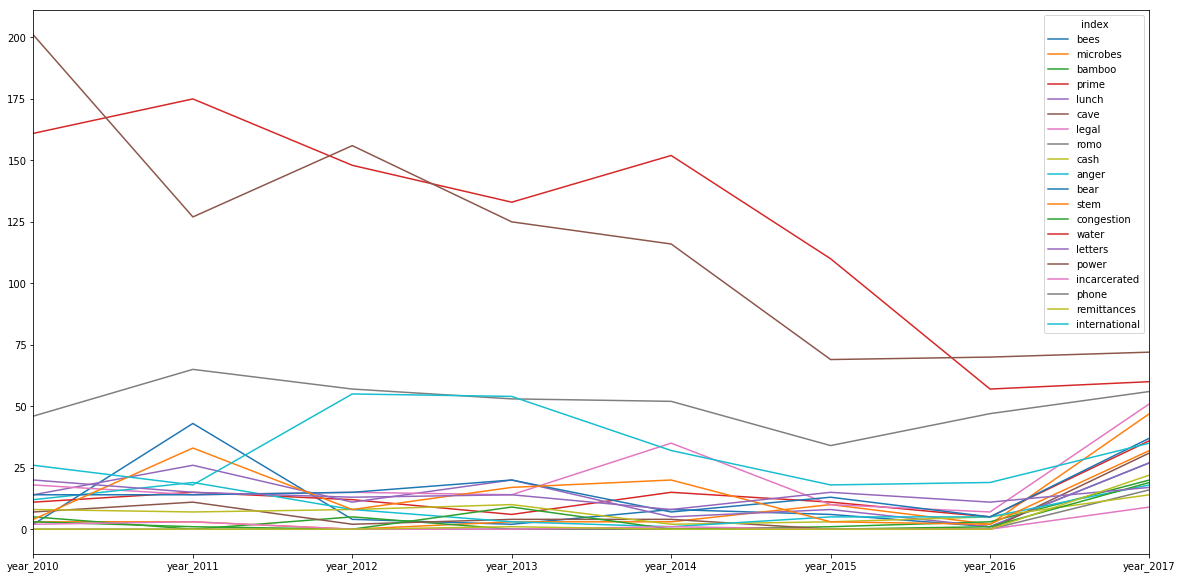

In [171]:
df_wc.T.plot(figsize=(20,10))